# The Central Limit Theorm

### Data Science 350
### Stephen Elston

## Introduction

The Central Limit Theorm is a fundamental relationship which underpins many of principles which make statistical methods work. Put another way, without the Central Limit Theorm much of what we do rountinely would simply not work. Specifically:

- CLT enables sampling methods
- Without a CLT we could not reliably compute confidence intervals
- Most statistical methods and machine learning algorithms rely on CLT. For example, Hypothesis tests rest on the CLT


## History

The CLT has been around in many forms and was refined for two centuries. The first published version was by de Moiver in 1738. He proved a special case for bernoulli trials.


![](img/deMoiver.jpg)

Laplace published generalization of the CLT in 1776, 1785 and 1820. A rigorous proof of a version close to the modern form was published by Chebyshev in 1887. Feller and Lévy worked on genralizations and some special cases into the mid 1930s. 



## The CLT

Sample a population many times, and the distribution of means of all samples are normally distributed, regardless of the population distribution.

More formally, in a simple yet general form we can write the CLT as:

$$population\ mean = \bar{X} \rightarrow \mu \\
distribution(\bar{X})  \rightarrow  N(\mu, \frac{\sigma}{\sqrt{n}}) \\
as \\
n \rightarrow \infty$$



## A First Example

Let's try an example. In this example you will crete and sample a distribution created as a mixure of normals. By the CLT the distribution of the mean of the sample should be Normal, dispite the original distribution.

### Generate mixture of Normals

The code in the cell below computes 2000 realizations of a distribution from a mixture of Normal. Run the code and examine the histogram.

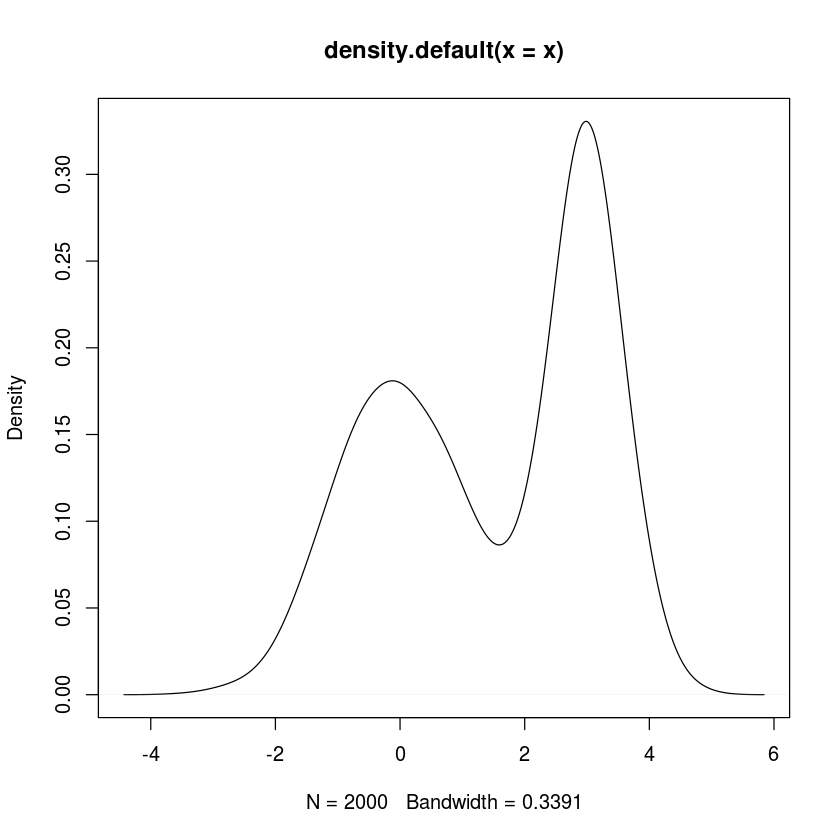

In [2]:
x = c(rnorm(1000),rnorm(1000,mean=3,sd=0.5))
plot(density(x)) # Definitely not normal

## Sample the distribution and examine means

The code in the cell below computes a list of 500 sample means from samples of size 50 from the population distribution. A histogram and Q-Q plot are created from the results are plotted. Run this code and note the results.

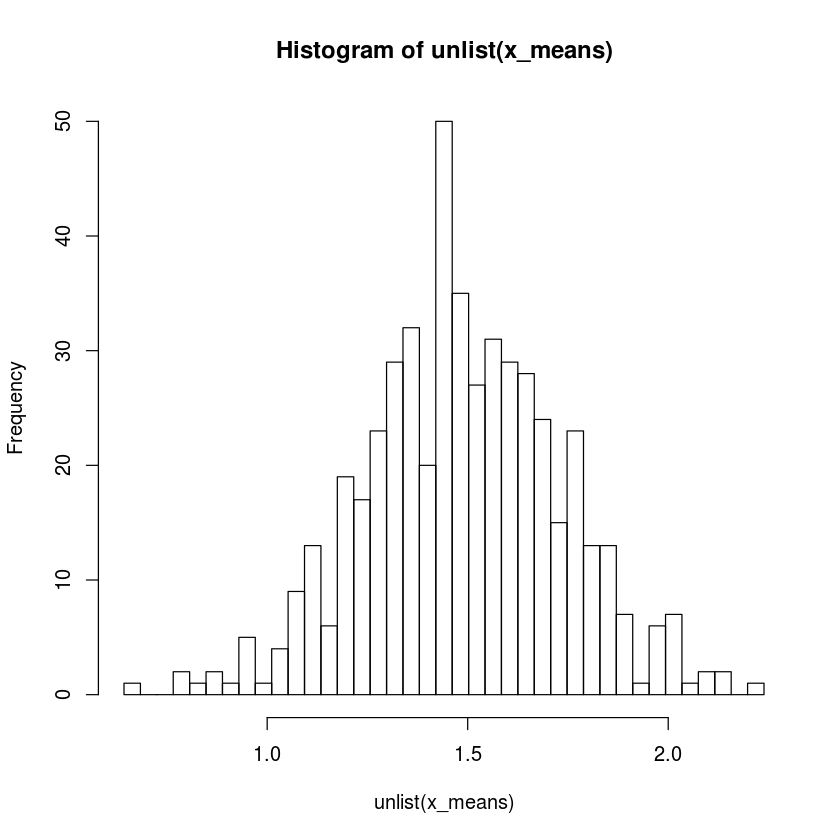

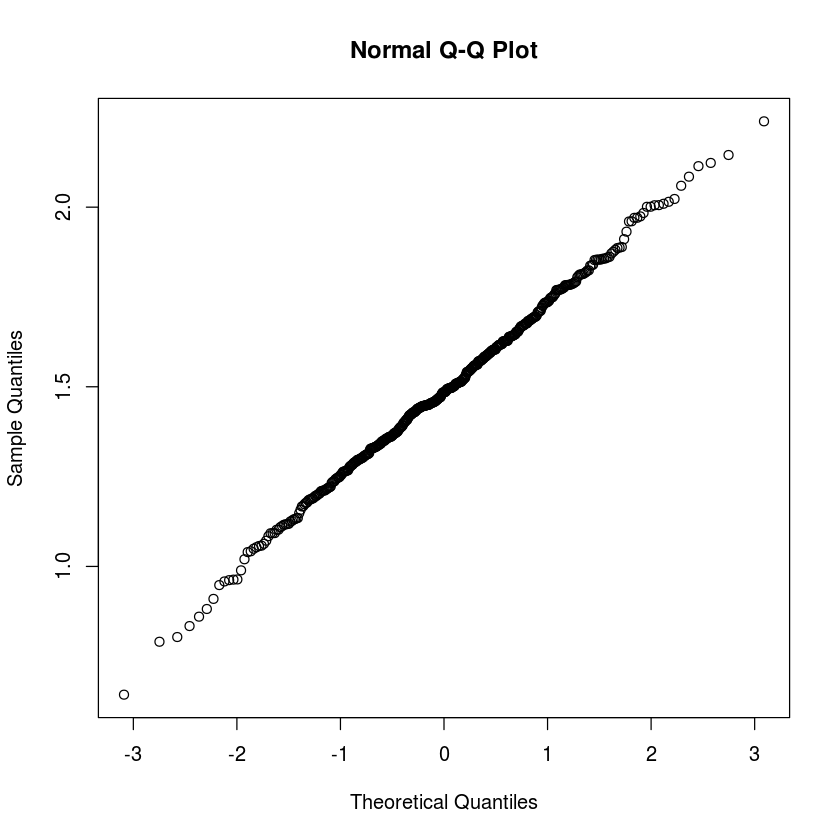

In [9]:
# generate 500 samples
x_samples = lapply(1:500, function(i) sample(x, size=50, replace=TRUE))
x_means = sapply(x_samples, mean)
breaks = seq(min(x_means), max(x_means), length.out = 40)
hist(unlist(x_means), breaks = breaks)
qqnorm(unlist(x_means)) # Yay normality!

The distriton of the sample means is close to Normal, even though the population is not. 

### Compute summary statistics

Next, run the code in the cell below to compute some summary statistics and examine the result. 

In [4]:
str(x_means)

 num [1:500] 1.48 1.43 1.32 1.43 1.68 ...


In [5]:
str(unlist(x_means))

 num [1:500] 1.48 1.43 1.32 1.43 1.68 ...


In [6]:
pop_mean_estimate = mean(unlist(x_means))
pop_mean_estimate
pop_mean_sd = sd(unlist(x_means))
pop_mean_sd

actual_mean = mean(x)
actual_mean

[1] 1.486037

[1] 0.2361839

[1] 1.493652

## Confidence Intervals

To create confidence intervals for population means, we use the central limit theorem and create confidence intervals based on the normal distribution.
- Repeatedly sample from the population.
- Calculate the mean for each sample.
- Use the average of the sample means as the population estimate and create a C.I. based on the s.d. of the sample means.

![](img/CIs.png)

Confidence intervals are a way to express uncertainty in population parameters, as estimated by the sample. However, it is **not correct to say:**
- “95% of the sample values are in this range.”
- “There is a 95% chance that the mean of another 
     sample will be in this range.”

Run the code in the cell below to 

In [10]:
alpha = 0.95
half_width = qnorm((1+alpha)/2, mean=pop_mean_estimate, sd = pop_mean_sd) - pop_mean_estimate
print(paste("The half width is ", round(half_width, 3)))

ci_low = pop_mean_estimate - half_width
ci_high = pop_mean_estimate + half_width

print(paste('The actual mean is',round(actual_mean,3)))
print(paste('The',alpha,'level CI is (',round(ci_low,3),',',round(ci_high,3),').'))

[1] "The half width is  0.463"
[1] "The actual mean is 1.494"
[1] "The 0.95 level CI is ( 1.023 , 1.949 )."


## Your Turn

The code in the cell below computes a population from a uniform distribution. Execute this code and examine the density plot.

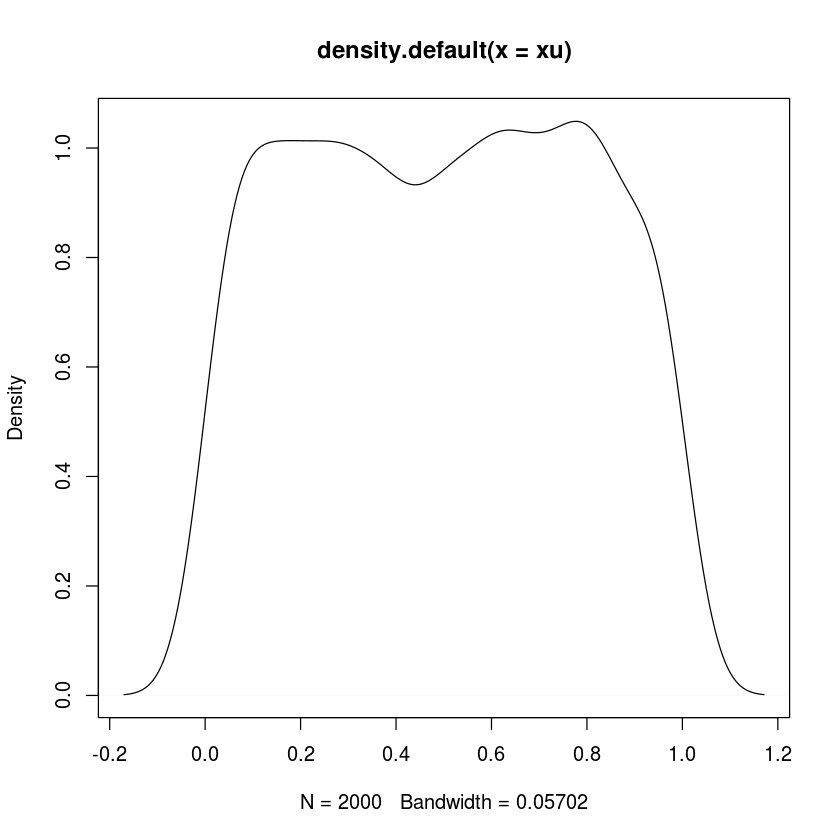

In [13]:
xu = runif(2000)
plot(density(xu)) # Definitely not normal

In the cell below create code to compute means of the uniform distribution, using 500 samples of size 50. Plot the histogram and Q-Q Normal plots of these means. Run your code several times and notice any changes in the distribution of the means.

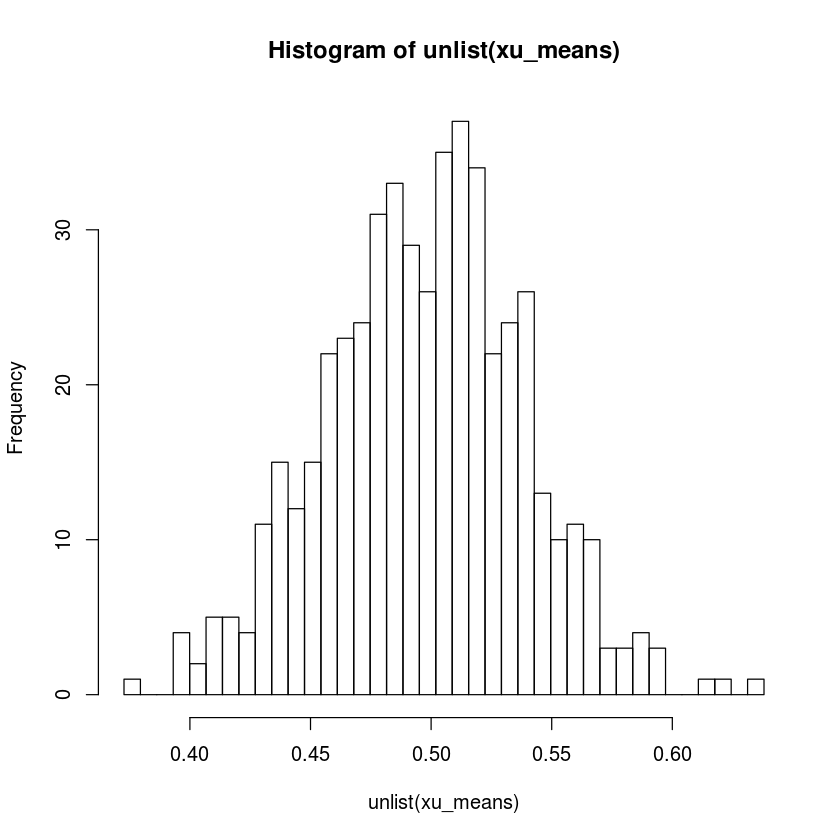

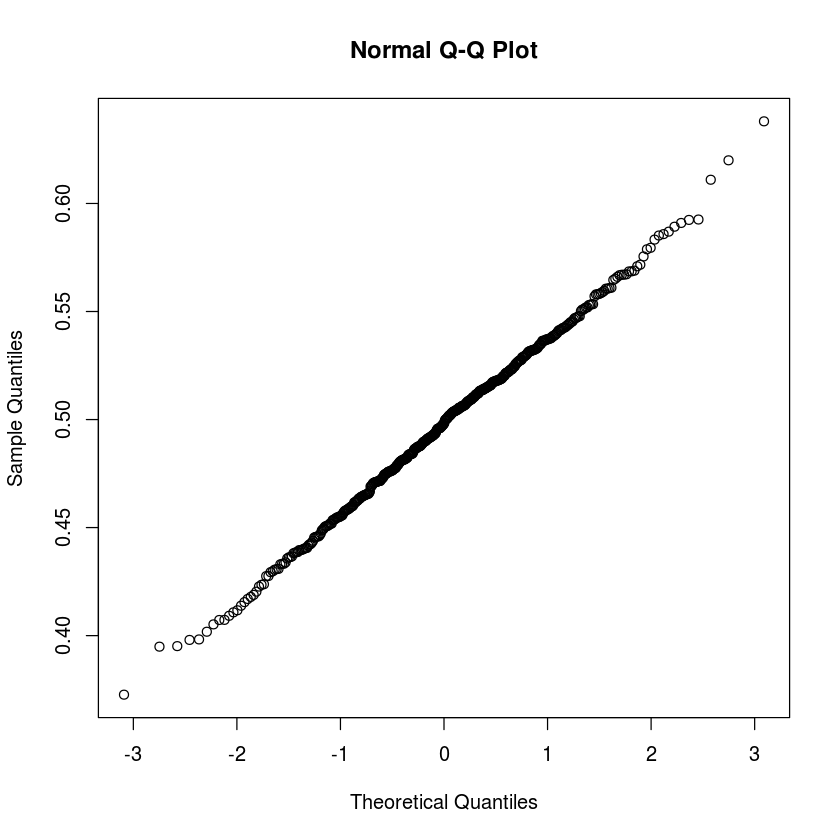

In [14]:

xu_samples = lapply(1:500, function(i) sample(xu, size=50, replace=TRUE))
xu_means = sapply(xu_samples, mean)
breaks = seq(min(xu_means), max(xu_means), length.out = 40)
hist(unlist(xu_means), breaks = breaks)
qqnorm(unlist(xu_means)) # Yay normality!

#### Copyright 2017 Stephen Elston. All rights reserved.